In [1]:
import numpy as np #to perform computations
from PIL import Image #to load image files
import matplotlib.pyplot as plt #to display image
from pickle import load,dump #to load or dump files
from keras.models import Model, load_model #to load available models
from keras.applications.xception import Xception,preprocess_input
from keras.preprocessing.sequence import pad_sequences
%matplotlib inline

In [2]:
def generate_Description(trained_Model,xception_Model,maximum_Length,img_path,inverse_vocab,tokenizer):
    test_image = Image.open(img_path)
    test_image = test_image.resize((299,299))
    test_image = np.array(test_image)
    if test_image.shape[2] == 4:
        test_image = test_image[..., :3]
    test_image = np.expand_dims(test_image, axis=0)
    test_image = test_image/127.5 #Normalizing
    test_image = test_image - 1.0 #Scaling
    features = xception_Model.predict(test_image)
    start_text = "start"
    for i in range(maximum_Length):
        sequence = tokenizer.texts_to_sequences([start_text])[0]
        sequence = pad_sequences([sequence], maxlen=maximum_Length)
        pred = model.predict([features,sequence], verbose=0)
        pred = np.argmax(pred)
        word = inverse_vocab[pred]
        if(word is None):
            break
        start_text+= ' '+ word
        if(word == 'end'):
            break
    return start_text

In [3]:
max_length = 33 #Maximum length of sentences
tokenized_text = load(open("Data/Flickr8k_text/tokenized_text.p","rb"))
model = load_model('Models/Finalized_Model/model-ep003-loss3.414-val_loss3.621.h5')
xception = Xception(include_top=False, pooling="avg") #to extract features for the input test images

#generating inverse vocabulary
vocab = {index:word for word,index in tokenized_text.word_index.items()}

### Adequate correct predictions

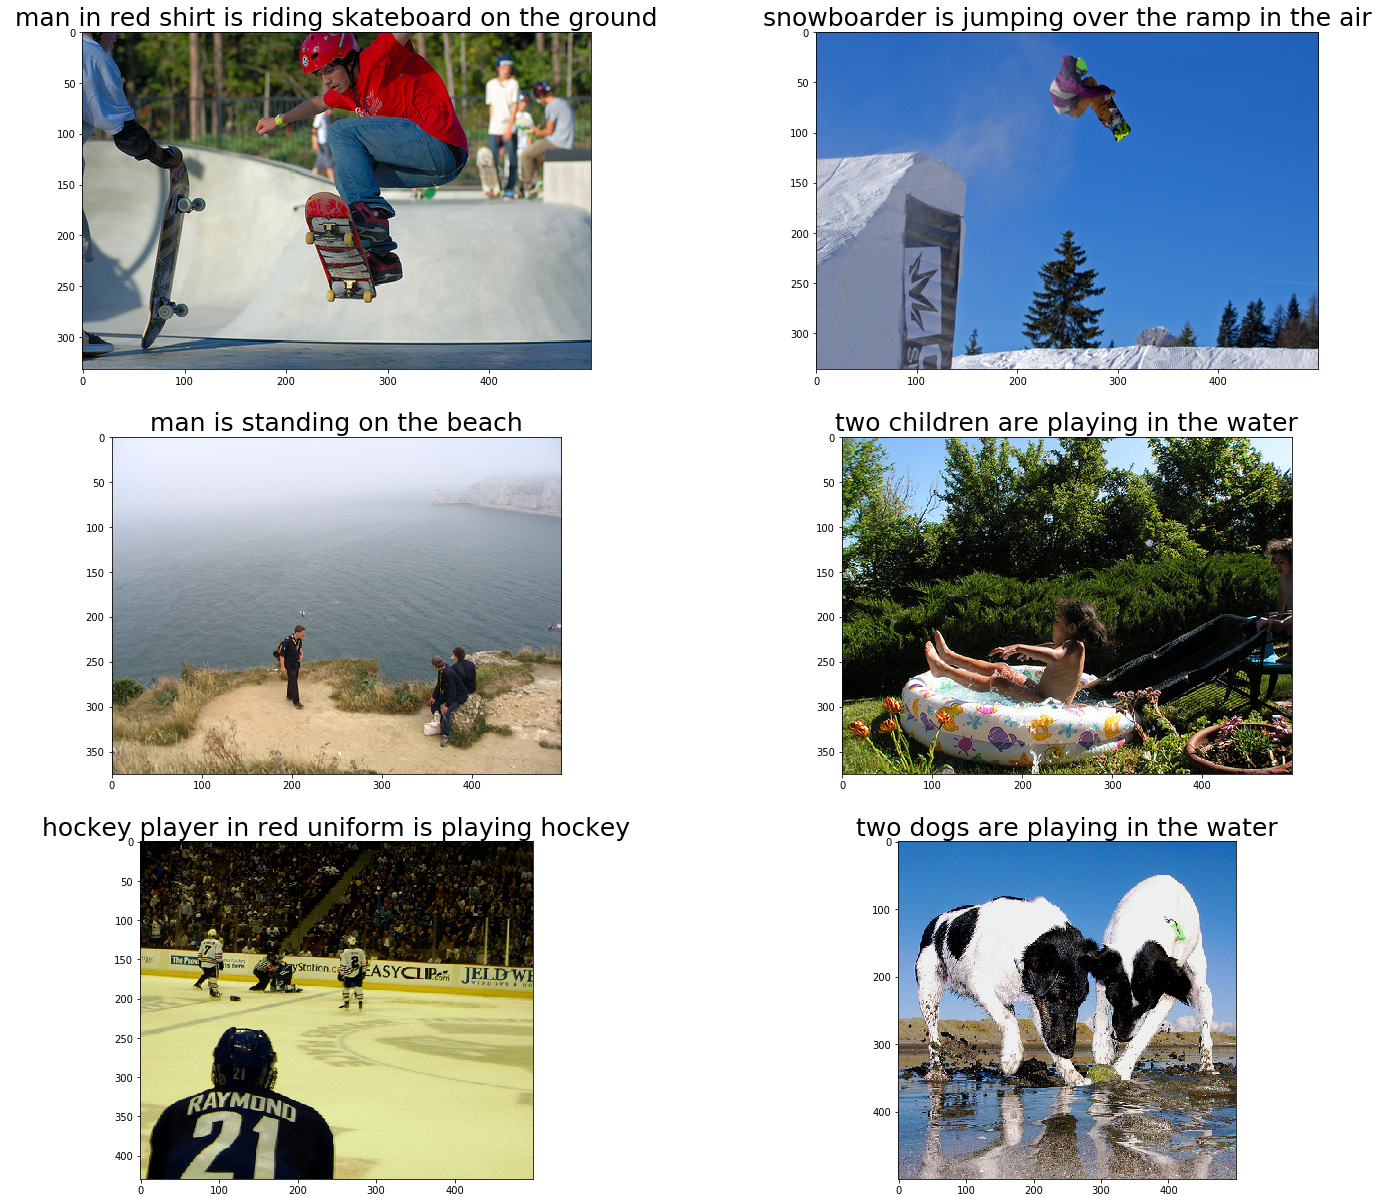

In [8]:
image_files = ['2207244634_1db1a1890b.jpg','3325974730_3ee192e4ff.jpg',
              '69710415_5c2bfb1058.jpg', '3670075789_92ea9a183a.jpg',
              '3503544012_1771be9d3a.jpg','805682444_90ed9e1ef3.jpg']
captions = []
for image in image_files:
    image_file = "Data/Flicker8k_Dataset/"+image
    caption = generate_Description(model,xception,max_length,image_file,vocab,tokenized_text).split("start")[1].split("end")[0]
    captions.append(caption)

#Visualisation
cols = 5
fig = plt.figure(figsize=(4, 6))
for no,(image,title) in enumerate(zip(image_files,captions)):
    a = fig.add_subplot(cols, np.ceil(len(image_files)/float(cols)), no + 1)
    img = Image.open("Data/Flicker8k_Dataset/"+image)
    plt.imshow(img)
    a.set_title(title,fontsize=25)
fig.set_size_inches(np.array(fig.get_size_inches()) * len(image_files))
plt.show()

### Inaccurate prediction

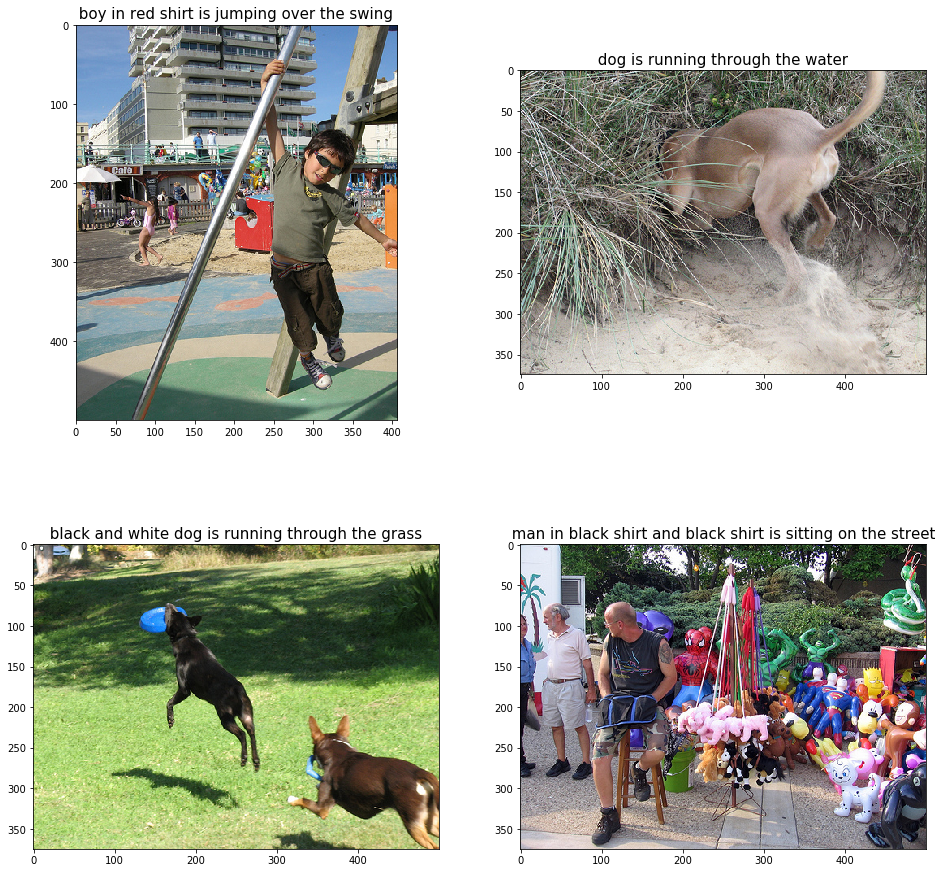

In [5]:
image_files = ['3759492488_592cd78ed1.jpg','276356412_dfa01c3c9e.jpg','2511019188_ca71775f2d.jpg',
               '2780087302_6a77658cbf.jpg']
captions = []
for image in image_files:
    image_file = "Data/Flicker8k_Dataset/"+image
    caption = generate_Description(model,xception,max_length,image_file,vocab,tokenized_text).split("start")[1].split("end")[0]
    captions.append(caption)

#Visualisation
cols = 2
fig = plt.figure(figsize=(4, 4))
for no,(image,title) in enumerate(zip(image_files,captions)):
    a = fig.add_subplot(cols, np.ceil(len(image_files)/float(cols)), no + 1)
    img = Image.open("Data/Flicker8k_Dataset/"+image)
    plt.imshow(img)
    a.set_title(title,fontsize=15)
fig.set_size_inches(np.array(fig.get_size_inches()) * len(image_files))
plt.show()